In [3]:
import sys; import os

import numpy as np
np.seterr(all='raise')
np.random.seed(13)
import pandas as pd

import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rc('text', usetex=True)
%matplotlib inline

import pylab
import scipy as sp
from scipy.optimize import minimize
from sklearn.decomposition import PCA

import urllib.request
import gzip
import struct

if not os.path.exists('dataset'):
    os.makedirs('dataset')
DATADIR='dataset'

print('Downloading training set')
fname = DATADIR+'/train.gz'
if not (os.path.exists(fname) and os.path.isfile(fname)):
    urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',fname)
print('Downloading training labels')
fname = DATADIR+'/train-labels.gz'
if not (os.path.exists(fname) and os.path.isfile(fname)):
    urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',fname)
print('Downloading test set')
fname = DATADIR+'/test.gz'
if not (os.path.exists(fname) and os.path.isfile(fname)):
    urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',fname)
print('Downloading test labels')
fname = DATADIR+'/test-labels.gz'
if not (os.path.exists(fname) and os.path.isfile(fname)):
    urllib.request.urlretrieve('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz',fname)
print('Done!')

# Esta función es una adaptación de la clase MNIST de la librería "python-mnist"
# que la encuentran en el siguiente vínculo: https://github.com/sorki/python-mnist
def loadSet(s='train'):
    from array import array
    with gzip.open('data/'+s+'-labels.gz', 'rb') as file:
        magic, size = struct.unpack(">II", file.read(8))
        if magic != 2049:
            raise ValueError('Magic number mismatch, expected 2049,'
                             'got {}'.format(magic))
        labels = np.array(array("B", file.read()))

    with gzip.open('data/'+s+'.gz', 'rb') as file:
        magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
        if magic != 2051:
            raise ValueError('Magic number mismatch, expected 2051,'
                             'got {}'.format(magic))
        image_data = array("B", file.read())
        images = np.zeros((size,rows*cols),dtype=np.uint8)
        for i in range(size):
            images[i][:] = image_data[i * rows * cols:(i + 1) * rows * cols]
    del array
    del sys.modules['array']
    return {
        'data':images,'target':labels,
        'target_names': np.unique(labels),
        # 'images': np.reshape(images,(size,rows,cols))
    }
MNIST_train = loadSet('train')

Done!


El elemento 13 del conjunto de datos corresponde al número: 6


<Figure size 432x288 with 0 Axes>

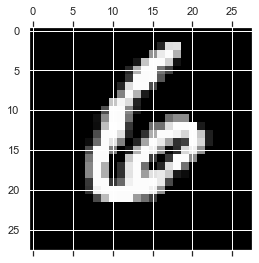

In [9]:
def display(dat):
    plt.gray()
    print("El elemento " + str(dat)+" del conjunto de datos corresponde al número:",MNIST_train['target'][dat])
    plt.matshow(np.reshape(MNIST_train['data'][dat],(28,28)))
    plt.show()
display(13)

In [21]:
def verifytag(digit):
    n_dig= np.sum(np.sum(MNIST_train['target'] == digit))
    n_ft=MNIST_train['data'].shape[1]
    redefTarget = lambda x,y: 1 if x==y else 0
    redefTarget = np.vectorize(redefTarget,excluded=(1,))
    MNIST_train['target_new'] = redefTarget(MNIST_train['target'],digit)
    print("Verificamos")
    print("\t¿cuántos con %d? %d"%(digit,n_dig))
    print("\t¿la suma de 'target_new'? %d"%np.sum(MNIST_train['target_new']))

In [23]:
verifytag(4)

Verificamos
	¿cuántos con 4? 5842
	¿la suma de 'target_new'? 5842
